# Regressão Logística com Descida de Gradiente Regularizada

Este notebook foi criado para facilitar a realização dos experimentos do trabalho. Caso funcione bem, podemos adotar esta ferramenta também em trabalhos futuros.

**Conteúdo do notebook: **

- classe com a implementação da regressão logística com descida de gradiente regularizada;
- main com exemplo de utilização da classe;
- código para gerar os resultados e realizar os experimentos;
- avaliação dos resultados;

**Requisitos para executar este notebook: **
- ter os arquivos do repositório deste notebook na mesma pasta;
- ter numpy instalado (recomendável instalar toda pilha scipy);
- ter sklearn instalado caso queira comparar os resultados;

**Classe da regressão logística com descida de gradiente regularizada:**

In [1]:
import numpy as np

#Hyperparameters: 
#	-Lambda: fator de regularização
#	-learning_rate: taxa de aprendizado
#	-epochs: número de iterações

class RegularizedLogisticRegression():
	def __init__(self):
		self.theta_n = []
		self.theta_0 = 0.
		self.loss = []

	def sigmoid(self, x):
		return (1/(1+np.exp(-x)))

	#inicializa os pesos aleatoriamente com amostras da distribuição normal
	def init_weights(self, dim):
		return np.random.randn(dim).reshape(dim,1)
		#return np.ones(dim).reshape(dim,1)

	#função de custo: cross-entropy
	def loss_function(self, Y, sigmoid_z, Lambda, m):
        # VERIFICAR SE A PARTE DA REGULARIZAÇÃO ESTÁ CERTA
		loss = -np.sum(np.multiply(Y,np.log(sigmoid_z)) + np.multiply(1-Y,np.log(1-sigmoid_z)))/m + np.multiply(np.sum(np.power(self.theta_n,2)), Lambda)/m

		return loss

	def prints(self, epoch):
		print("--epoca %s: " % epoch)
		print("loss: ", self.loss[epoch])
		print("theta: ", self.theta_0.reshape(theta[0].shape[0]), self.theta_n.reshape(theta[1].shape[0]))

	def gradient_descent(self, epochs, X, Y, Lambda, learning_rate, m, print_results):
		for i in range(epochs):
			#calcula Z
			Z = np.dot(self.theta_n.T, X) + self.theta_0

			#calcula gradientes
			sigmoid_z = self.sigmoid(Z)	#função de ativação

			gZ = sigmoid_z - Y
			
			gTheta_n = np.dot(X, gZ.T)/m
			gTheta_0 = np.sum(gZ)/m

			#calcula função de custo
			loss = self.loss_function(Y, sigmoid_z, Lambda, m)
			self.loss.append(loss)

			#atualiza pesos
			self.theta_0 -= learning_rate*gTheta_0
			self.theta_n = self.theta_n*(1-(learning_rate*Lambda/m)) - learning_rate*gTheta_n

			if print_results:
				self.prints(i)

		#calcula função de custo final
		Z = np.dot(self.theta_n.T, X) + self.theta_0
		sigmoid_z = self.sigmoid(Z)	#função de ativação
		loss = self.loss_function(Y, sigmoid_z, Lambda, m)

		self.loss.append(loss)

	def fit(self, X, Y, epochs=3, learning_rate=0.01, Lambda=0.001, print_results=False):
		#dimensão dos dados
		m = X.shape[0]
		n = X.shape[1]

		#inicializa os pesos aleatoriamente
		self.theta_n = self.init_weights(n)
		self.theta_0 = self.init_weights(1)
		
		X = X.T
		Y = Y.reshape(1,m)

		#verifica as dimensões
		#assert(self.theta_n.shape[0] == X.shape[0])
		
		self.gradient_descent(epochs, X, Y, Lambda, learning_rate, m, print_results)

		return self

	def accuracy_score(self, X, Y):
		m = X.shape[0]
		Y_pred = self.predict(X)
		#número de exemplos menos o número de erros dividido pelo número de exemplos
		accuracy =  float(m - np.sum(np.logical_xor(Y_pred, Y)))/m

		return accuracy

	def predict(self, X):
		X = X.T

		#verifica as dimensões antes de fazer o produto interno
		#assert(self.theta_n.shape[0] == X.shape[0])

		Z = np.dot(self.theta_n.T, X) + self.theta_0
		sigmoid_z = self.sigmoid(Z)	#função de ativação

		#Z.shape == (1,m)
		#sigmoid_z.shape = (1,m) -> todas as predições estão neste array

		#verifica se cada predição é maior ou igual a 0.5 e atribui classe 0 ou 1
		Y_predict = np.greater_equal(sigmoid_z, 0.5)

		return Y_predict.astype(int).flatten()

**exemplo de uso**

Neste exemplo é utilizada uma versão modificada do dataset iris do repositório UCI. Neste dataset uma classe foi excluída para que o dataset fosse transformado para ser utlizado em um problema de classificação binária.

In [2]:
#aqui no notebook não precisa importar, mas pra executar localmente com o interpretador precisa
#from regressao_logistica_regularizado import RegularizedLogisticRegression
import csv
import numpy as np
from sklearn.metrics import accuracy_score
import time

#PREPARAÇÃO DO DATASET
X = []
Y = []
with open('iris_mod.csv', 'r') as f:
	reader = csv.reader(f)
	for r in reader:
		x = r[:-1]
		X.append([float(a) for a in x])
		Y.append(int(r[-1]))

X = np.array(X)
Y = np.array(Y)

indices = np.arange(X.shape[0])

np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]

TRAIN_SIZE = int(.8 * X.shape[0])

X_train = X[:TRAIN_SIZE]
Y_train = Y[:TRAIN_SIZE]

X_test = X[TRAIN_SIZE:]
Y_test = Y[TRAIN_SIZE:]

#REGRESSÃO LOGÍSTICA
LR = RegularizedLogisticRegression()

epochs = 30

LR.fit(X_train,Y_train, epochs=epochs, learning_rate=0.08, Lambda=0.1, print_results=False)
print("train accuracy: " + str(LR.accuracy_score(X_train,Y_train)*100.0) + "%")

Y_predict = LR.predict(X_test)

print('test accuracy: ' + str(LR.accuracy_score(X_test,Y_test)*100.0) + "%")
#print accuracy_score(Y_test,Y_predict)	#sklearn accuracy

print('final loss: ' + str(LR.loss[-1]))


train accuracy: 100.0%
test accuracy: 100.0%
final loss: 0.0542353052139


**Loss x Iteração**

Abaixo está o código para plotar o gráfico da função de custo ao longo de cada iteração.

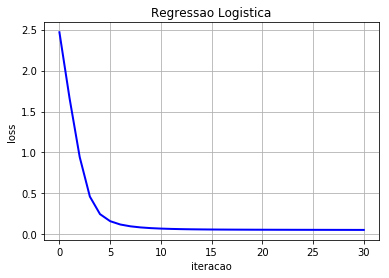

In [5]:
import matplotlib.pyplot as plt

#só precisa na primeira execução

#gera lista com os números das iterações
#epochs = range(epochs)
#epochs.append(epochs[-1] + 1)

#

plt.plot(epochs, LR.loss, color='blue', linewidth=2)
#plt.axis([0,4,.092,.098])
#plt.xticks([0,1,2,3,4])
plt.xlabel('iteracao')
plt.ylabel('loss')
plt.title('Regressao Logistica')
plt.grid(True)
#plt.text(.14,.55, r'$\alpha = 0.01$')
#aux = 'Iteracao ' + str(i+1)
#legends.append(mpatches.Patch(color=colors[i], label=aux))
#plt.legend(handles=legends[:])

plt.show()